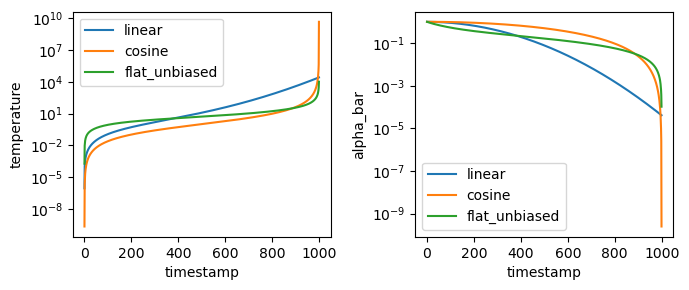

In [2]:
from config import load_config
from diffusion import get_ddpm
import matplotlib.pyplot as plt
from utils import get_time_evenly_spaced


cfg = load_config()

t = get_time_evenly_spaced(1000)
cfg.ddpm.schedule_type = "linear_beta"
temp_linear = get_ddpm(cfg).dynamic.get_temp(t).squeeze()
cfg.ddpm.schedule_type = "cosine"
temp_cosine = get_ddpm(cfg).dynamic.get_temp(t).squeeze()
cfg.ddpm.schedule_type = "flattening_temp_unbiased"
temp_flat_unbiased = get_ddpm(cfg).dynamic.get_temp(t).squeeze()


temps = {
    "linear": temp_linear,
    "cosine": temp_cosine,
    "flat_unbiased": temp_flat_unbiased,
}


plt.figure(figsize=(7, 3))

plt.subplot(1, 2, 1)

for name, temp in temps.items():
    plt.plot(temp, label=name)

plt.yscale("log")
plt.xlabel("timestamp")
plt.ylabel("temperature")
plt.legend()


plt.subplot(1, 2, 2)

for name, temp in temps.items():
    plt.plot(1 / (1 + temp), label=name)

plt.xlabel("timestamp")
plt.ylabel("alpha_bar")
plt.legend()
plt.yscale("log")


# plt.subplot(1, 3, 3)

# for name, dyn in dyns.items():
#     plt.plot(dyn.beta, label=name)

# plt.xlabel("timestamp")
# plt.ylabel("beta")
# plt.legend()
# plt.yscale("log")

plt.tight_layout()
plt.show()

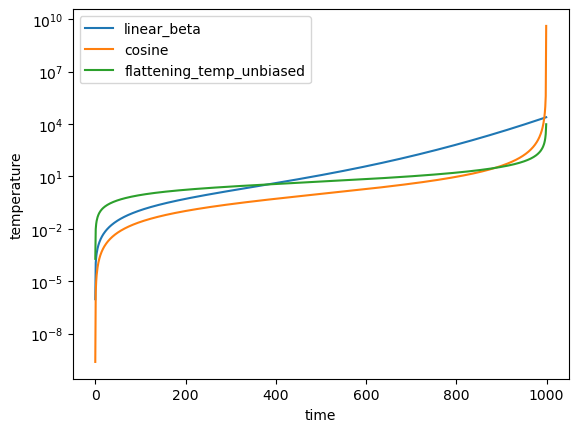

In [3]:
from config import load_config
from diffusion import get_ddpm
import matplotlib.pyplot as plt
from utils import get_time_evenly_spaced


config = load_config()
for schedule_type in ["linear_beta", "cosine", "flattening_temp_unbiased"]:
    config.ddpm.schedule_type = schedule_type
    t = get_time_evenly_spaced(1000)
    temp = get_ddpm(config).dynamic.get_temp(t).view(-1)
    plt.plot(temp, label=schedule_type)

plt.xlabel("time")
plt.ylabel("temperature")
plt.yscale("log")
plt.legend()
plt.show()